# Analyse statistique

Le jeu de données contient 14 993 profils d'animaux, avec des caractéristiques telles que l'âge, la race, le sexe, la couleur, les frais d'adoption, etc. La variable cible AdoptionSpeed mesure le délai d’adoption selon 5 classes, de 0 (adoption le jour même) à 4 (non adopté après 100 jours).



Analyse de la variable cible : `AdoptionSpeed`

La variable `AdoptionSpeed` représente la **vitesse à laquelle un animal a été adopté** :

| Valeur | Interprétation                      |
|--------|--------------------------------------|
| 0      | Adopté **le jour même**              |
| 1      | Adopté entre **1 et 7 jours**        |
| 2      | Adopté entre **8 et 30 jours**       |
| 3      | Adopté entre **31 et 90 jours**      |
| 4      | **Non adopté** après 100 jours       |

### Distribution de la variable `AdoptionSpeed`

Le graphique ci-dessus montre la répartition des animaux selon leur vitesse d’adoption (`AdoptionSpeed`) :

- **0** : Adopté le jour même → **410 animaux**
- **1** : Adopté entre 1 et 7 jours → **3 090 animaux**
- **2** : Adopté entre 8 et 30 jours → **4 037 animaux**
- **3** : Adopté entre 31 et 90 jours → **3 259 animaux**
- **4** : **Non adopté après 100 jours** → **4 197 animaux**

#### Interprétation :
- La **majorité des animaux** ne sont pas adoptés rapidement : la classe **4 (non adoptés)** est la plus fréquente.
- Les classes **1 et 2** regroupent une part importante des adoptions rapides/modérées.
- Seuls **410 animaux** sont adoptés le jour même, ce qui en fait une classe très minoritaire.
  
Cette répartition très déséquilibrée peut poser problème pour un modèle de classification, car certaines classes (comme la 0) sont **très peu représentées**.

Interpretation :

Aucune variable ne présente une forte corrélation (supérieure à 0.3 ou inférieure à –0.3), ce qui suggère que AdoptionSpeed est un phénomène multifactoriel, influencé par de petites interactions entre plusieurs variables.

La faible corrélation globale pourrait aussi expliquer pourquoi les performances des modèles ML sont moyennes.

In [ ]:
!pip install kmodes

# Clusteing

on va regrouper les animaux dans des classes en fonction de leurs ressemblances

# 1 - parler sur les résultat de kaggles

Bien que ce jeu de données ait déjà été exploité dans le cadre d’une compétition organisée sur Kaggle, les résultats obtenus par les participants ont plafonné autour d'une précision de 45%, malgré l’utilisation de modèles avancés et d’approches algorithmiques sophistiquées. Ce plafond de performance interroge : est-ce dû à la qualité des données, à des facteurs structurels ignorés, ou à des limites des modèles utilisés ?

Ce projet propose de prendre le problème à la racine : plutôt que de chercher uniquement à améliorer les scores, il s'agit de comprendre pourquoi ces performances stagnent, en explorant en profondeur les données, les variables et les relations cachées, ce que les modèles ont peut-être raté. L’objectif est double : mieux expliquer le phénomène d’adoption, et envisager des pistes concrètes pour faire mieux.

# 6 - pour résoudre le problème on décide de grouper les classes autrement
La variable AdoptionSpeed, utilisée comme cible dans cette étude, représente la rapidité avec laquelle un animal est adopté. Elle se décline en cinq modalités ordinales :

    0 : adopté en un jour,

    1 : adopté entre 2 et 7 jours,

    2 : adopté entre 8 et 30 jours,

    3 : adopté entre 31 et 90 jours,

    4 : jamais adopté.

Bien que cette granularité puisse sembler intéressante pour capturer la diversité des situations, elle pose en réalité plusieurs difficultés pratiques et analytiques dans le cadre de la modélisation.

L’analyse exploratoire montre que les classes ne sont pas représentées de manière équilibrée. Certaines, comme la classe 0 (adoption en 1 jour) sont nettement moins fréquentes que d’autres. Cet important déséquilibre rend l’entraînement des modèles plus complexe, car ces classes sont soit sous-apprises, soit sur-apprises avec un fort risque de surapprentissage. Les algorithmes classiques de classification peuvent alors être biaisés vers les classes majoritaires, au détriment des performances globales.

<ipython-input-1-6b1ae7cdadd6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="AdoptionSpeed", data=df, palette="Set2")


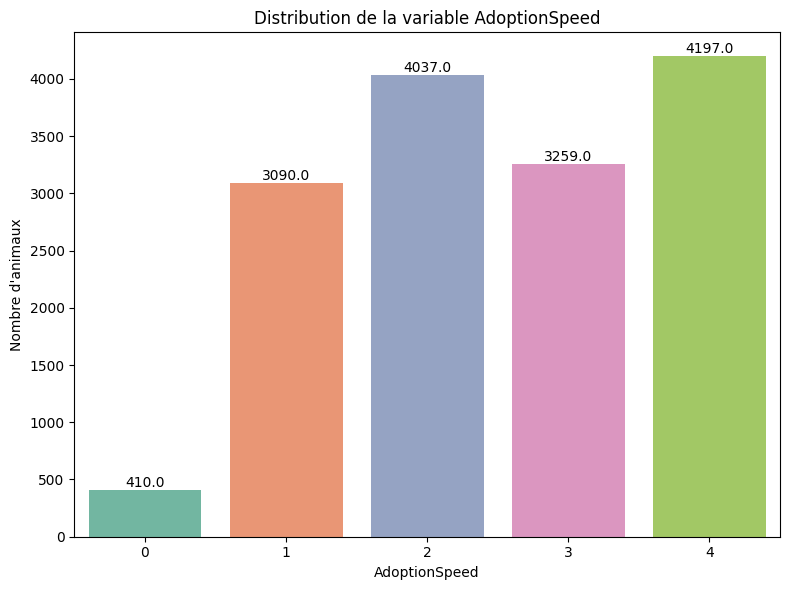

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Chargement des données
df = pd.read_csv('/content/data_clean.csv')

# Création du graphique
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="AdoptionSpeed", data=df, palette="Set2")

# Ajout des annotations sur chaque barre
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Titres et labels
plt.title("Distribution de la variable AdoptionSpeed")
plt.xlabel("AdoptionSpeed")
plt.ylabel("Nombre d'animaux")
plt.tight_layout()
plt.show()


In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
pip install fanalysis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
# 📦 Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.mca import MCA
import numpy as np


In [ ]:
# 📥 Chargement des données
df = pd.read_csv("data_clean.csv")
df = df.drop(columns=["PetID"])  # suppression de l'identifiant


In [ ]:
# 🔍 Aperçu général
display(df.head())
display(df.dtypes)
display(df.describe(include="all"))
print("Valeurs manquantes :")
print(df.isnull().sum())
print("Doublons :", df.duplicated().sum())


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,0,3.0,2


,0
Type,int64
Age,int64
Breed1,int64
Breed2,int64
Gender,int64
Color1,int64
Color2,int64
Color3,int64
MaturitySize,int64
FurLength,int64


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


Valeurs manquantes :
Type             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
VideoAmt         0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64
Doublons : 462


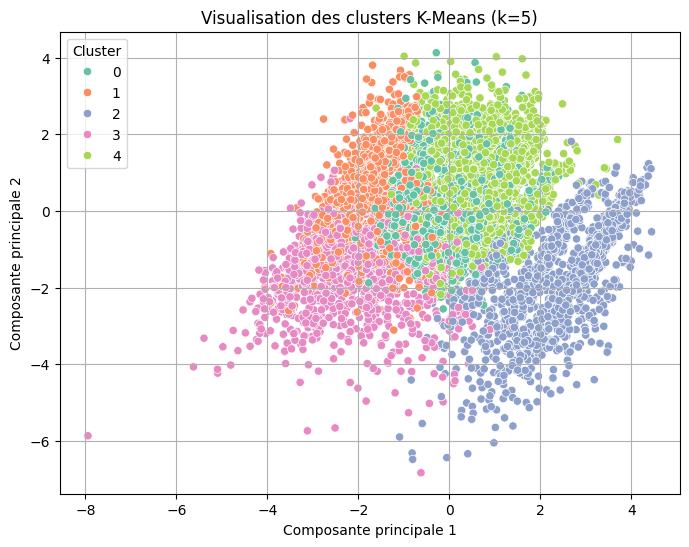

In [2]:
#1. Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#2. Chargement des données
df = pd.read_csv("/content/data_clean.csv")  # change le chemin si besoin

#3. Sélection des variables pertinentes (sans 'Quantity')
features = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
    'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
    'Health', 'Fee', 'PhotoAmt'
]
X = df[features]

#4. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5. Réduction de dimension avec PCA (2 composantes pour visualisation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#6. Clustering avec KMeans (par exemple avec k=3)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#7. Ajout des clusters dans le DataFrame original
df['Cluster'] = clusters
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 📊 8. Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f"Visualisation des clusters K-Means (k={k})")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


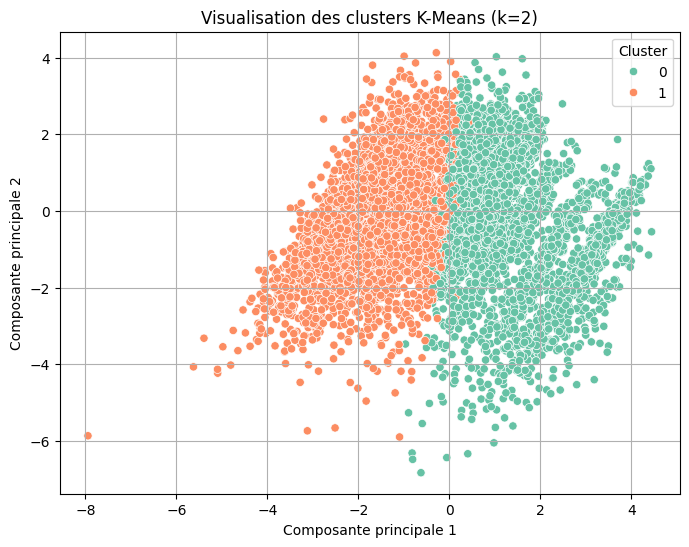

In [3]:
#1. Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#2. Chargement des données
df = pd.read_csv("/content/data_clean.csv")  # change le chemin si besoin

#3. Sélection des variables pertinentes (sans 'Quantity')
features = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
    'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
    'Health', 'Fee', 'PhotoAmt'
]
X = df[features]

#4. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5. Réduction de dimension avec PCA (2 composantes pour visualisation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#6. Clustering avec KMeans (par exemple avec k=3)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#7. Ajout des clusters dans le DataFrame original
df['Cluster'] = clusters
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 📊 8. Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f"Visualisation des clusters K-Means (k={k})")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


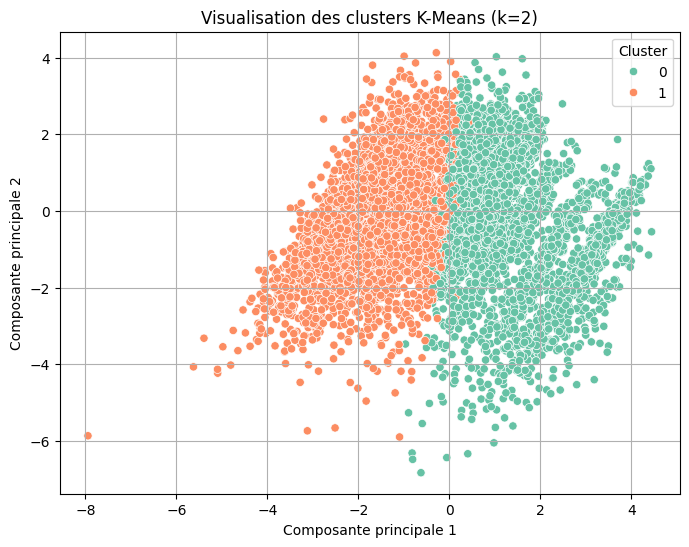

In [4]:
#1. Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#2. Chargement des données
df = pd.read_csv("/content/data_clean.csv")  # change le chemin si besoin

#3. Sélection des variables pertinentes (sans 'Quantity')
features = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
    'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
    'Health', 'Fee', 'PhotoAmt'
]
X = df[features]

#4. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5. Réduction de dimension avec PCA (2 composantes pour visualisation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#6. Clustering avec KMeans (par exemple avec k=3)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#7. Ajout des clusters dans le DataFrame original
df['Cluster'] = clusters
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 📊 8. Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title(f"Visualisation des clusters K-Means (k={k})")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


🎯 Classification Report (toutes variables) :
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      2261
           1       0.61      0.62      0.62      2237

    accuracy                           0.61      4498
   macro avg       0.61      0.61      0.61      4498
weighted avg       0.61      0.61      0.61      4498

✅ Accuracy : 0.6127167630057804
✅ Precision (weighted) : 0.6128450745325851
✅ Recall (weighted) : 0.6127167630057804
✅ F1-score (weighted) : 0.6126790126087949

📊 MSE: 0.3857
📈 Bias: 0.2829
📉 Variance: 0.1028


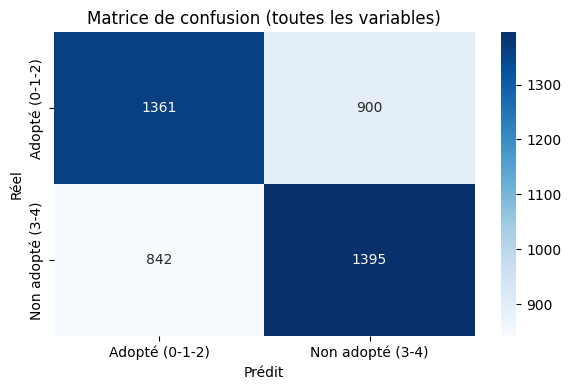


🔁 Scores de validation croisée (accuracy sur 5 folds) : [0.62754251 0.6282094  0.62187396 0.62174783 0.62808539]
Moyenne CV : 0.6255


In [10]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.feature_selection import SelectFromModel
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Chargement des données
df = pd.read_csv("/content/data_clean.csv")

# ✅ Recatégorisation : Groupe 0 = [0,1,2], Groupe 1 = [3,4]
df["AdoptionSpeed2"] = df["AdoptionSpeed"].apply(lambda x: 0 if x in [0, 1, 2] else (1 if x in [3, 4] else None))
df_filtered = df.dropna(subset=["AdoptionSpeed2"])
df['PureBreed'] = df['Breed2'].apply(lambda x: 0 if x != 0 else 1)

# Créer les nouvelles variables pour Breed1 et Breed2 avec -1 au lieu de NaN
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'],-1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'],-1000)


# Supprimer les colonnes Breed1 et Breed2
df = df.drop(['Breed1', 'Breed2'], axis=1)
# Sélection des features
features = ['Age', 'breed1_chat', 'breed1_chien', 'breed2_chat', 'breed2_chien', 'Color1', 'Color2',
            'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'PhotoAmt', 'Fee',
            'PureBreed', 'VideoAmt', 'Health']

X = df[features]
y = df["AdoptionSpeed2"]

# ⚙️ Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✂️ Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# 🌲 Modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Évaluations
print("🎯 Classification Report (toutes variables) :\n", classification_report(y_test, y_pred))
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("✅ Precision (weighted) :", precision_score(y_test, y_pred, average='weighted'))
print("✅ Recall (weighted) :", recall_score(y_test, y_pred, average='weighted'))
print("✅ F1-score (weighted) :", f1_score(y_test, y_pred, average='weighted'))

# 📉 MSE, Bias, Variance
mse, bias, var = bias_variance_decomp(
    model, X_train, y_train.values, X_test, y_test.values,
    loss='mse', num_rounds=50, random_seed=123
)
print("\n📊 MSE:", round(mse, 4))
print("📈 Bias:", round(bias, 4))
print("📉 Variance:", round(var, 4))

# 📊 Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Adopté (0-1-2)", "Non adopté (3-4)"],
            yticklabels=["Adopté (0-1-2)", "Non adopté (3-4)"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion (toutes les variables)")
plt.tight_layout()
plt.show()

# 🔄 Validation croisée
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("\n🔁 Scores de validation croisée (accuracy sur 5 folds) :", cv_scores)
print("Moyenne CV :", round(cv_scores.mean(), 4))


In [5]:
from sklearn.model_selection import GridSearchCV

# 🌲 Définir le modèle de base
rf = RandomForestClassifier(random_state=42)

# 📊 Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 🔍 GridSearch avec validation croisée à 5 plis
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 🧠 Entraînement avec la recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# ✅ Affichage des meilleurs paramètres
print("✅ Meilleurs hyperparamètres :", grid_search.best_params_)

# 📌 Meilleur modèle entraîné
best_model = grid_search.best_estimator_

# 🧪 Prédictions
y_pred = best_model.predict(X_test)

# 📈 Évaluation
print("🎯 Classification Report :\n", classification_report(y_test, y_pred))
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("✅ Precision :", precision_score(y_test, y_pred, average='weighted'))
print("✅ Recall :", recall_score(y_test, y_pred, average='weighted'))
print("✅ F1-score :", f1_score(y_test, y_pred, average='weighted'))

# 🔁 Validation croisée du meilleur modèle
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='accuracy')
print("🔁 CV Scores :", cv_scores)
print("✅ Moyenne CV :", round(cv_scores.mean(), 4))

# 📉 MSE, Bias, Variance
mse, bias, var = bias_variance_decomp(
    best_model, X_train, y_train.values, X_test, y_test.values,
    loss='mse', num_rounds=50, random_seed=123
)
print("\n📊 MSE:", round(mse, 4))
print("📈 Bias:", round(bias, 4))
print("📉 Variance:", round(var, 4))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Meilleurs hyperparamètres : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
🎯 Classification Report :
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64      2138
         1.0       0.66      0.61      0.63      2237

    accuracy                           0.64      4375
   macro avg       0.64      0.64      0.64      4375
weighted avg       0.64      0.64      0.64      4375

✅ Accuracy : 0.6374857142857143
✅ Precision : 0.6389308831917602
✅ Recall : 0.6374857142857143
✅ F1-score : 0.6372661127250009
🔁 CV Scores : [0.64004114 0.63866987 0.64038396 0.63237311 0.63786008]
✅ Moyenne CV : 0.6379

📊 MSE: 0.3683
📈 Bias: 0.3072
📉 Variance: 0.0611


🎯 Classification Report (toutes variables) :
               precision    recall  f1-score   support

         0.0       0.60      0.59      0.59      2138
         1.0       0.61      0.63      0.62      2237

    accuracy                           0.61      4375
   macro avg       0.61      0.61      0.61      4375
weighted avg       0.61      0.61      0.61      4375

✅ Accuracy : 0.6086857142857143
✅ Precision (weighted) : 0.6085330147163284
✅ Recall (weighted) : 0.6086857142857143
✅ F1-score (weighted) : 0.6085165976827229

📊 MSE: 0.394
📈 Bias: 0.2912
📉 Variance: 0.1028


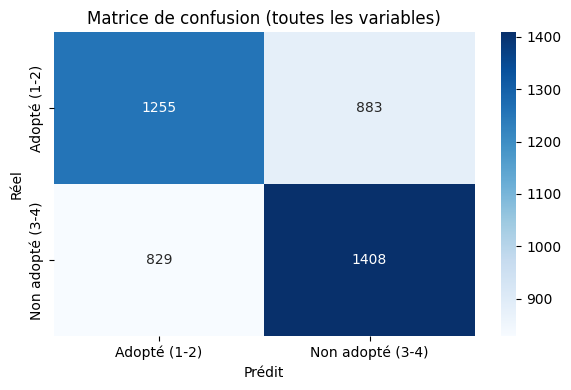


🔁 Scores de validation croisée (accuracy sur 5 folds) : [0.63489887 0.62050051 0.62564278 0.62414266 0.62345679]
Moyenne CV : 0.6257


In [4]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.feature_selection import SelectFromModel
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Chargement des données
df = pd.read_csv("/content/data_clean.csv")

# ✅ Recatégorisation logique :
# Groupe 1 = [1, 2]  → 0
# Groupe 2 = [3, 4]       → 1
df["AdoptionSpeed2"] = df["AdoptionSpeed"].apply(lambda x: 0 if x in [1, 2] else (1 if x in [3, 4] else None))
df['PureBreed'] = df['Breed2'].apply(lambda x: 0 if x != 0 else 1)
df = df.dropna(subset=["AdoptionSpeed2"])


# Créer les nouvelles variables pour Breed1 et Breed2 avec -1 au lieu de NaN
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'],-1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'],-1000)


# Supprimer les colonnes Breed1 et Breed2
df = df.drop(['Breed1', 'Breed2'], axis=1)
# Sélection des features
features = ['Age', 'breed1_chat', 'breed1_chien', 'breed2_chat', 'breed2_chien', 'Color1', 'Color2',
            'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'PhotoAmt', 'Fee',
            'PureBreed', 'VideoAmt', 'Health']

X = df[features]
y = df["AdoptionSpeed2"]

# ⚙️ Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✂️ Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# 🌲 Modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Évaluations
print("🎯 Classification Report (toutes variables) :\n", classification_report(y_test, y_pred))
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("✅ Precision (weighted) :", precision_score(y_test, y_pred, average='weighted'))
print("✅ Recall (weighted) :", recall_score(y_test, y_pred, average='weighted'))
print("✅ F1-score (weighted) :", f1_score(y_test, y_pred, average='weighted'))

# 📉 MSE, Bias, Variance
mse, bias, var = bias_variance_decomp(
    model, X_train, y_train.values, X_test, y_test.values,
    loss='mse', num_rounds=50, random_seed=123
)
print("\n📊 MSE:", round(mse, 4))
print("📈 Bias:", round(bias, 4))
print("📉 Variance:", round(var, 4))

# 📊 Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Adopté (1-2)", "Non adopté (3-4)"],
            yticklabels=["Adopté (1-2)", "Non adopté (3-4)"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion (toutes les variables)")
plt.tight_layout()
plt.show()

# 🔄 Validation croisée
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("\n🔁 Scores de validation croisée (accuracy sur 5 folds) :", cv_scores)
print("Moyenne CV :", round(cv_scores.mean(), 4))


In [6]:
from sklearn.model_selection import GridSearchCV

# 🌲 Définir le modèle de base
rf = RandomForestClassifier(random_state=42)

# 📊 Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 🔍 GridSearch avec validation croisée à 5 plis
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 🧠 Entraînement avec la recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# ✅ Affichage des meilleurs paramètres
print("✅ Meilleurs hyperparamètres :", grid_search.best_params_)

# 📌 Meilleur modèle entraîné
best_model = grid_search.best_estimator_

# 🧪 Prédictions
y_pred = best_model.predict(X_test)

# 📈 Évaluation
print("🎯 Classification Report :\n", classification_report(y_test, y_pred))
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("✅ Precision :", precision_score(y_test, y_pred, average='weighted'))
print("✅ Recall :", recall_score(y_test, y_pred, average='weighted'))
print("✅ F1-score :", f1_score(y_test, y_pred, average='weighted'))

# 🔁 Validation croisée du meilleur modèle
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='accuracy')
print("🔁 CV Scores :", cv_scores)
print("✅ Moyenne CV :", round(cv_scores.mean(), 4))

# 📉 MSE, Bias, Variance
mse, bias, var = bias_variance_decomp(
    best_model, X_train, y_train.values, X_test, y_test.values,
    loss='mse', num_rounds=50, random_seed=123
)
print("\n📊 MSE:", round(mse, 4))
print("📈 Bias:", round(bias, 4))
print("📉 Variance:", round(var, 4))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Meilleurs hyperparamètres : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
🎯 Classification Report :
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64      2138
         1.0       0.66      0.61      0.63      2237

    accuracy                           0.64      4375
   macro avg       0.64      0.64      0.64      4375
weighted avg       0.64      0.64      0.64      4375

✅ Accuracy : 0.6374857142857143
✅ Precision : 0.6389308831917602
✅ Recall : 0.6374857142857143
✅ F1-score : 0.6372661127250009
🔁 CV Scores : [0.64004114 0.63866987 0.64038396 0.63237311 0.63786008]
✅ Moyenne CV : 0.6379

📊 MSE: 0.3683
📈 Bias: 0.3072
📉 Variance: 0.0611
